### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [1]:
import numpy as np

import pandas as pd

from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (16, 9)

plt.style.use('ggplot')

from sklearn import metrics

from sklearn.cluster import KMeans

import seaborn as sns

from scipy.stats import zscore

In [2]:
vehicle_df = pd.read_csv('vehicle.csv')

In [4]:
vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [6]:
vehicle_df.shape

(846, 19)

In [8]:
new_vehicle_df=vehicle_df.dropna()

In [9]:
new_vehicle_df.shape

(813, 19)

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [10]:
new_vehicle_df['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

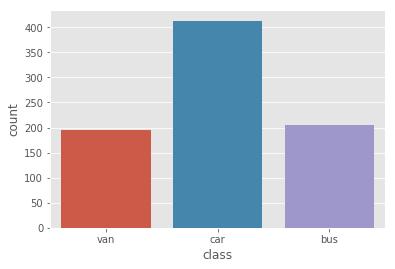

In [11]:
sns.countplot(new_vehicle_df['class'])

### Check for any missing values in the data 

In [12]:
new_vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

#### No missing values

### 3. Standardize the data 

In [15]:
# first dropping the class attribute
new_vehicle_x = new_vehicle_df.drop('class', axis = 1)

In [18]:
std_vehicle_df = new_vehicle_x.apply(zscore)

In [19]:
std_vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

### K - Means Clustering

### 4. Assign a dummy array called distortion

In [41]:
cluster_range = range(2, 11)   
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(std_vehicle_df)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  cluster_sil_scores.append(metrics.silhouette_score(std_vehicle_df, labels, metric='euclidean'))
    


You can later use this array to plot the elbow plot

### 5. Calculating distortion - C distance

In [44]:
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors , "Avg_Sil_Score": cluster_sil_scores } )
clusters_df[0:15]

,num_clusters,cluster_errors,Avg_Sil_Score
0,2,8623.136976,0.389788
1,3,7037.467395,0.290415
2,4,6422.271783,0.247602
3,5,5193.019499,0.241587
4,6,4706.560628,0.211835
5,7,4363.824428,0.223519
6,8,4097.454736,0.225079
7,9,3847.414545,0.211315
8,10,3667.785584,0.198423


Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

### 6. Plotting Elbow/ Scree Plot

#### Elbow plot with Clusters vs Errors

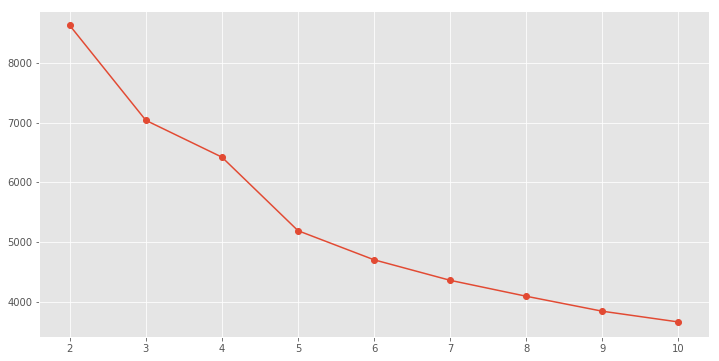

In [45]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marbker = "o" )

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

#### Elbow plot with clusters vs silhoutte scores

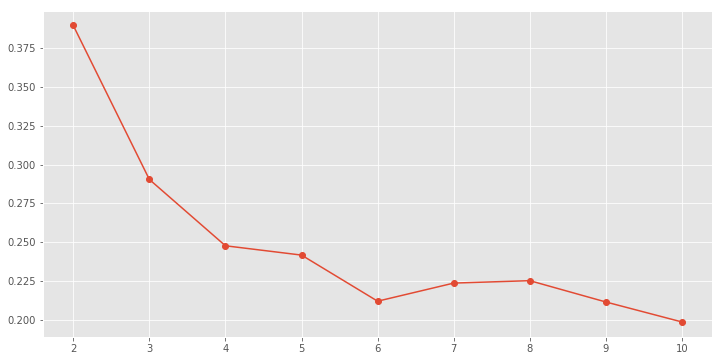

In [46]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.Avg_Sil_Score, marker = "o" )

### Find out the optimal value of K

#### The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

#### The errors are flattening out after the 5th cluster

#### Since after 5th cluster the sil_scores are comparatively smaller and also the errors are not so much dropping after the 5th cluster, the optimal value for K is 5

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [47]:
cluster = KMeans( n_clusters = 5, random_state = 1 )
cluster.fit(std_vehicle_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [51]:
centroids = cluster.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns = list(std_vehicle_df) )

In [54]:
centroids_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.943185,-0.532066,-0.919520,-1.095751,-0.558329,-0.322554,-0.785823,0.875046,-0.751415,-0.505428,-0.807658,-0.788907,-0.394250,0.812407,-0.104231,-0.290040,-1.069789,-1.142937
1,0.117209,0.047450,0.232106,0.404644,0.300786,-0.044602,0.074058,-0.277041,0.017547,0.009508,0.114021,0.022476,0.033216,-0.450284,0.086077,-0.040591,0.532586,0.478329
2,1.254746,1.311315,1.290706,0.974203,0.050599,0.253808,1.412550,-1.282622,1.428858,1.235667,1.293086,1.432570,1.219942,-0.038226,0.213491,0.310380,-0.105003,0.138490
3,-0.383962,-0.927293,-0.578736,-0.284995,0.063148,-0.232259,-0.731791,0.656276,-0.741180,-0.846187,-0.696654,-0.702557,-0.982914,-0.759942,-0.187859,0.039815,0.987722,0.830683
4,-0.733024,0.072735,-0.272171,2.947683,6.836652,8.696706,-0.535008,0.466248,-0.557406,0.283411,1.697528,-0.588068,0.212701,4.965638,-0.274839,-0.231193,-0.707994,-0.453651


Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [55]:
prediction=cluster.predict(std_vehicle_df)
std_vehicle_df["class"] = prediction


In [56]:
std_vehicle_df.groupby("class").count()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
class,,,,,,,,,,,,,,,,,,
0,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230
1,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169
2,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219
3,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187
4,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [112]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

### 9. Combine all three arrays a,b,c into a dataframe

In [113]:
df = pd.DataFrame(np.concatenate([a,b,c], axis= 0), columns = ['X','Y'])

In [114]:
df.head()

,X,Y
0,10.009250,0.744553
1,11.769940,-0.152419
2,9.190096,0.653403
3,8.785874,2.265595
4,10.261065,2.484059


### 10. Use scatter matrix to print all the 3 distributions

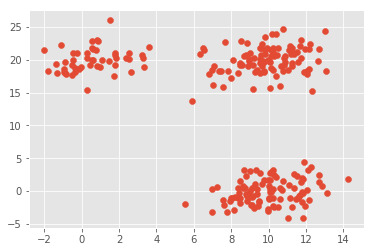

In [117]:
plt.scatter(x='X', y = 'Y',data = df)

### 11. Find out the linkage matrix

In [118]:
from sklearn.cluster import AgglomerativeClustering

Use ward as linkage metric and distance as Eucledian

In [119]:
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean',  linkage='ward')

In [120]:
model.fit(df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=6,
            pooling_func=<function mean at 0x000002038EE072F0>)

In [121]:
df['labels'] = model.labels_

df.groupby(["labels"]).count()

,X,Y
labels,,
0,53,53
1,43,43
2,50,50
3,28,28
4,47,47
5,29,29


In [122]:
df_clusters = df.groupby(['labels'])

In [123]:
df_groups=df_clusters.head(1599)

In [124]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [125]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [126]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(df, 'ward')
c, coph_dists = cophenet(Z , pdist(df))

c

0.9610431349122056

In [127]:
Z.shape
Z[1:10]

array([[1.94000000e+02, 1.95000000e+02, 6.35568008e-02, 2.00000000e+00],
       [3.80000000e+01, 9.60000000e+01, 7.10538471e-02, 2.00000000e+00],
       [1.57000000e+02, 2.24000000e+02, 7.39261844e-02, 2.00000000e+00],
       [1.37000000e+02, 1.45000000e+02, 8.16422971e-02, 2.00000000e+00],
       [1.21000000e+02, 1.46000000e+02, 9.57285154e-02, 2.00000000e+00],
       [1.11000000e+02, 1.17000000e+02, 9.91644467e-02, 2.00000000e+00],
       [3.20000000e+01, 9.20000000e+01, 1.05716148e-01, 2.00000000e+00],
       [1.64000000e+02, 1.79000000e+02, 1.06146713e-01, 2.00000000e+00],
       [1.78000000e+02, 2.15000000e+02, 1.09806916e-01, 2.00000000e+00]])

### 12. Plot the dendrogram for the consolidated dataframe

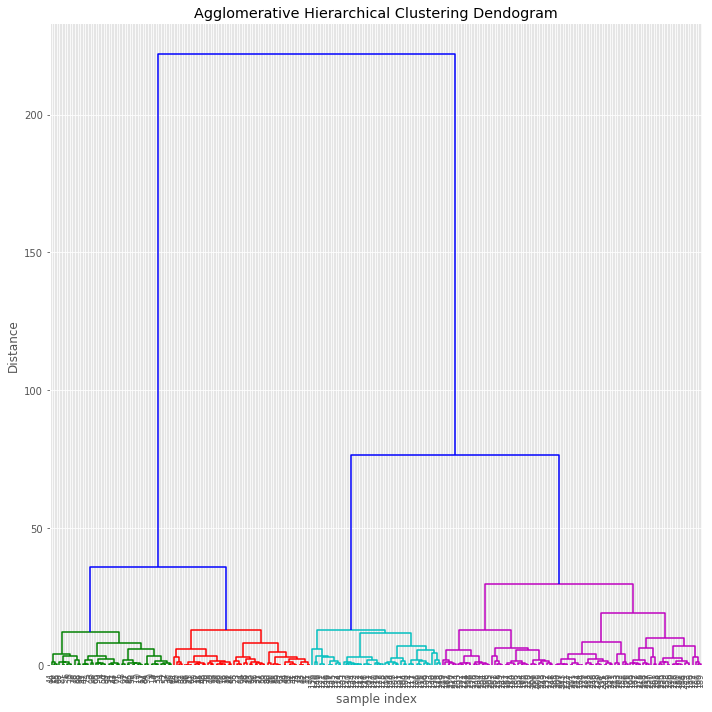

In [128]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 30, leaf_font_size=8. )
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

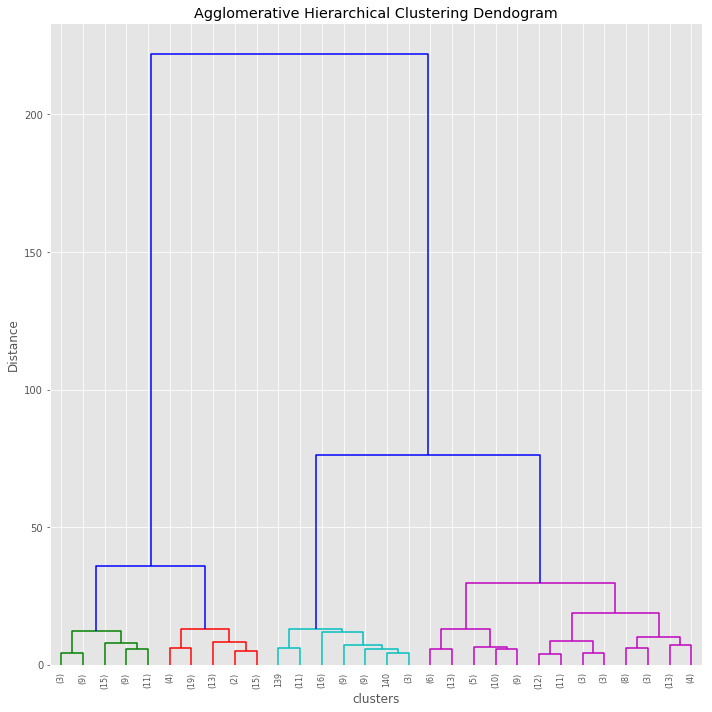

In [129]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('clusters')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 30, leaf_font_size=8.,truncate_mode='lastp' )
plt.tight_layout()

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

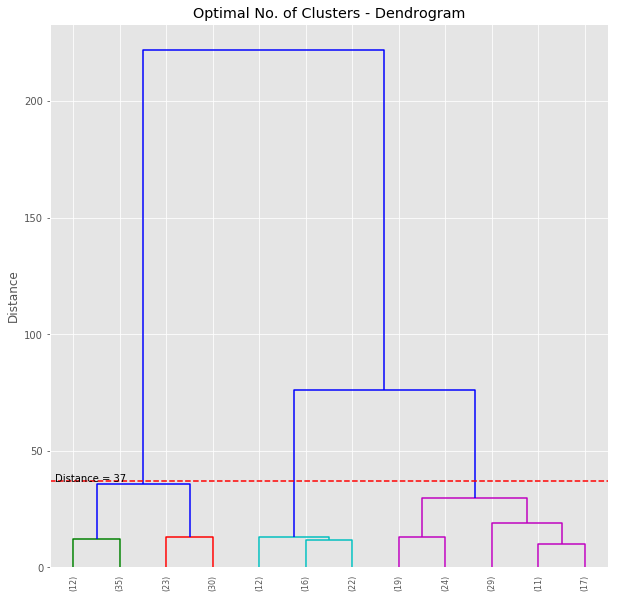

In [148]:
plt.figure(figsize=(10, 10))
plt.title('Optimal No. of Clusters - Dendrogram')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 30, leaf_font_size=8.,truncate_mode='lastp',p = 12 )
plt.axhline(y=37, color='r', linestyle='--')
plt.text(x = 1, y = 37, s = 'Distance = 37', )
plt.show()

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [93]:
from scipy.cluster.hierarchy import fcluster

In [149]:
fcluster(Z,t =37,criterion = 'distance')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

### Use matplotlib to visually observe the clusters in 2D space 

<Figure size 720x720 with 0 Axes>

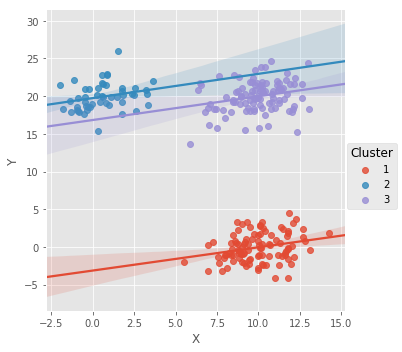

In [150]:
plt.figure(figsize=(10,10))
df['Cluster'] = fcluster(Z, t=37, criterion='distance')
sns.lmplot(x='X',y='Y',hue='Cluster',data=df)